In [17]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
sns.set_theme(style="ticks")
import matplotlib.pyplot as plt
#import community
from networkx.algorithms.community import greedy_modularity_communities
#import community.community_louvain as cl
import pandas as pd
import scipy.stats as stats
import networkx as nx
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [18]:
df_cora_sim = pd.read_csv('cora_cosine_weights25.csv')

In [19]:
df_nodes=pd.read_csv('cora_labels.csv')

In [20]:
#scaler = MinMaxScaler(feature_range=(0, 1)) #
#df_cora['weight'] = scaler.fit_transform(df_cora[['weight']])#
#df_cora.head()

In [21]:
df_cora = df_cora_sim[['source','target','weight']]
df_cora['weight']= 1 - df_cora['weight']
#df_cora_sim['weight']= 1 / df_cora_sim['weight']
df_cora.head()

,source,target,weight
0,0,633,0.016517
1,0,1862,0.018748
2,0,2582,0.019655
3,1,2,0.093427
4,1,652,0.036496


In [22]:
cora_graph= nx.from_pandas_edgelist(df_cora, 'source', 'target', create_using=nx.DiGraph())

In [23]:
cora_graph.number_of_edges()

5278

In [24]:
GNN_dist= nx.from_pandas_edgelist(df_cora, 'source', 'target', edge_attr='weight', 
                             create_using=nx.DiGraph())

In [25]:
GNN_sim= nx.from_pandas_edgelist(df_cora_sim, 'source', 'target', edge_attr='weight', 
                             create_using=nx.DiGraph())

# Degree Centrality

## GNN_cora

In [26]:
# Calculate the weighted degree centrality
def weighted_out_degree(G):
  # Calcolo della weighted out-degree centrality
  out_degrees = dict(G.out_degree(weight='weight'))
  max_weight = max(out_degrees.values())
  weighted_out_degrees = {node: (degree / max_weight) for node, degree in out_degrees.items()}

  # Calcolo della somma delle weighted out-degree centralities
  total_weighted_out_degree = sum(weighted_out_degrees.values())

  # Normalizzazione della weighted out-degree centrality
  weighted_out_degree_centrality_normalized = {node: (degree / total_weighted_out_degree) for node, degree in weighted_out_degrees.items()}
  return dict(sorted(weighted_out_degree_centrality_normalized.items(), key=lambda x: x[1], reverse=True))
# Print the result

def weighted_in_degree(G):
  in_degrees = dict(G.in_degree(weight='weight'))
  max_weight = max(in_degrees.values())
  weighted_in_degrees = {node: (degree / max_weight) for node, degree in in_degrees.items()}

  # Calcolo della somma delle weighted in-degree centralities
  total_weighted_in_degree = sum(weighted_in_degrees.values())

  # Normalizzazione della weighted in-degree centrality
  weighted_in_degree_centrality_normalized = {node: (degree / total_weighted_in_degree) for node, degree in weighted_in_degrees.items()}

  return dict(sorted(weighted_in_degree_centrality_normalized.items(), key=lambda x: x[1], reverse=True))

In [27]:
GNN_dist_out_degree = weighted_out_degree(GNN_dist)
GNN_dist_in_degree = weighted_in_degree(GNN_dist)

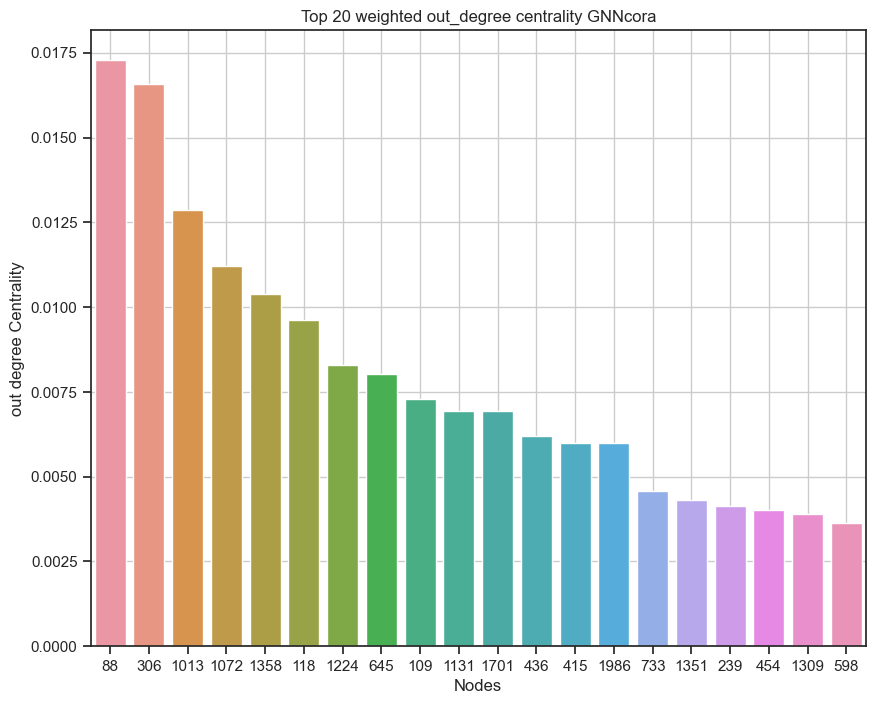

In [28]:
keys = list(map(str,list(GNN_dist_out_degree.keys())[:20]))
values = list(GNN_dist_out_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes')
plt.ylabel('out degree Centrality')
plt.title('Top 20 weighted out_degree centrality GNNcora')
plt.grid()
plt.show()

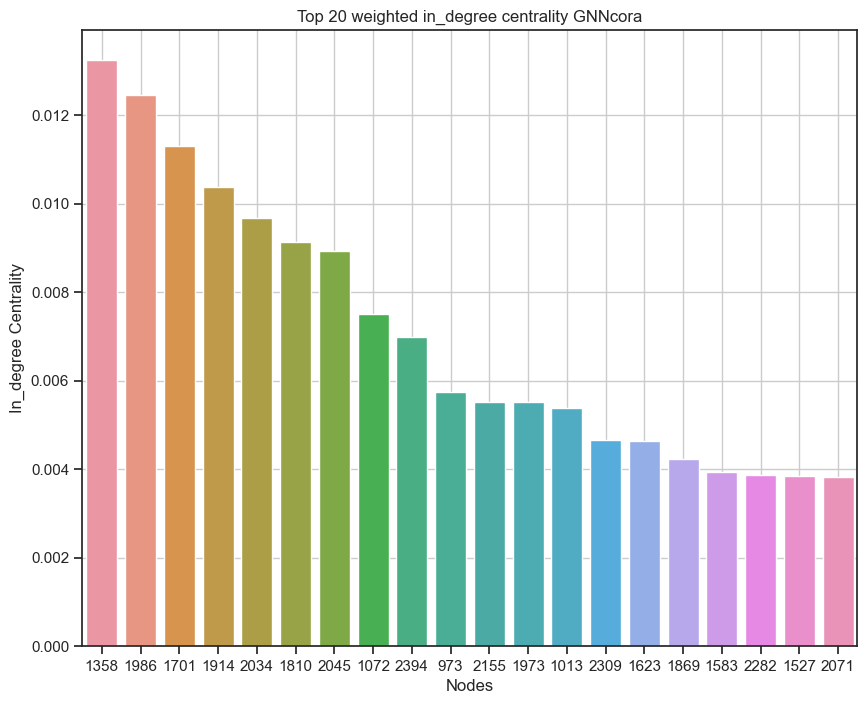

In [29]:
keys = list(map(str,list(GNN_dist_in_degree.keys())[:20]))
values = list(GNN_dist_in_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes')
plt.ylabel('In_degree Centrality')
plt.title('Top 20 weighted in_degree centrality GNNcora')
plt.grid()
plt.show()

## cora graph

In [30]:
cora_out_degree = weighted_out_degree(cora_graph)
cora_in_degree = weighted_in_degree(cora_graph)

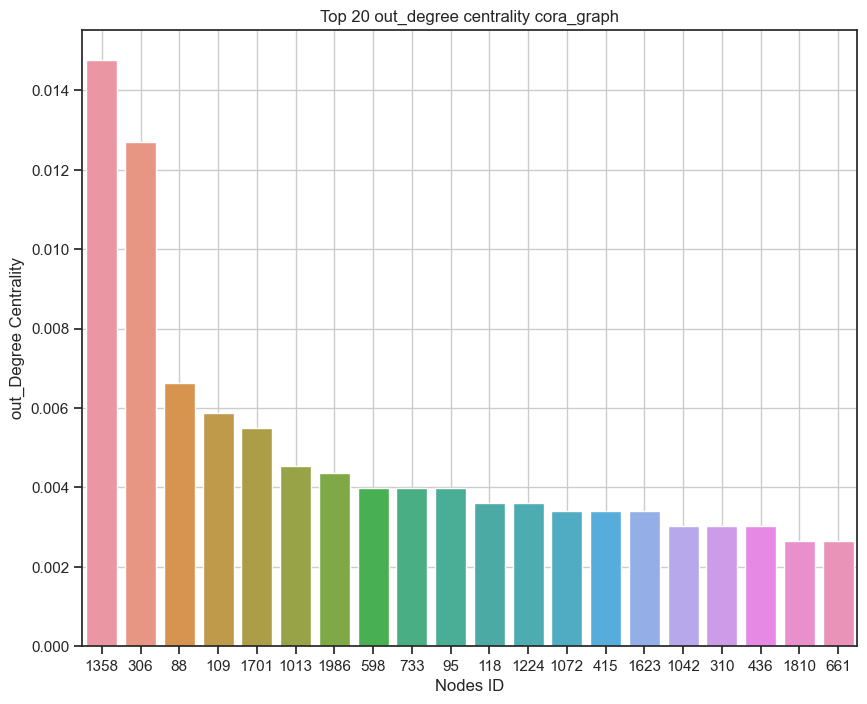

In [31]:

keys = list(map(str,list(cora_out_degree.keys())[:20]))
values = list(cora_out_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('out_Degree Centrality')
plt.title('Top 20 out_degree centrality cora_graph')
plt.grid()
plt.show()

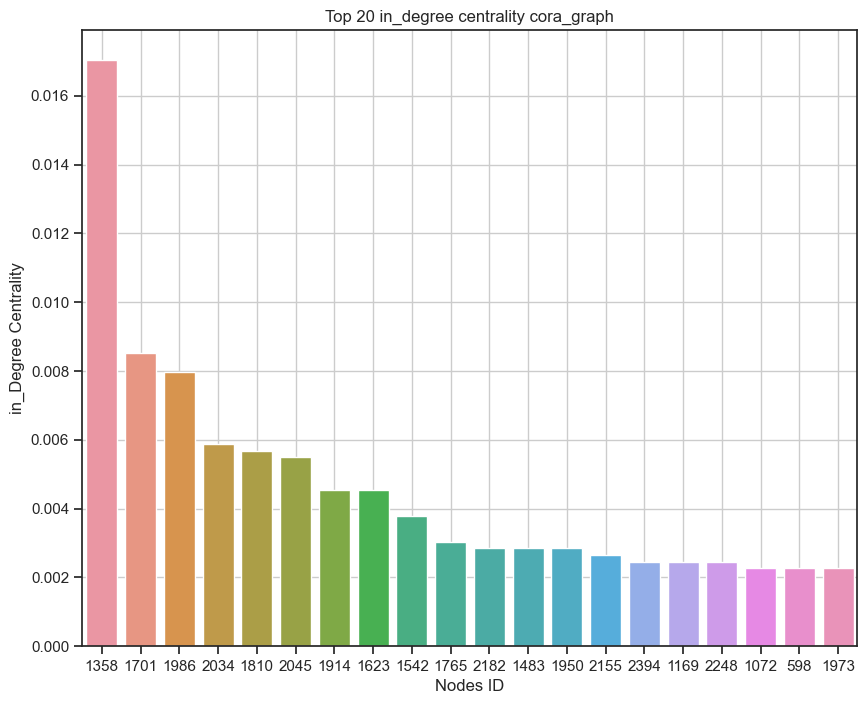

In [32]:
keys = list(map(str,list(cora_in_degree.keys())[:20]))
values = list(cora_in_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('in_Degree Centrality')
plt.title('Top 20 in_degree centrality cora_graph')
plt.grid()
plt.show()

# Betweeness centrality

## GNN_cora

In [33]:
#questa centralità interpreta i pesi come distanza
GNN_betweeness = nx.betweenness_centrality(GNN_dist, weight = 'weight')

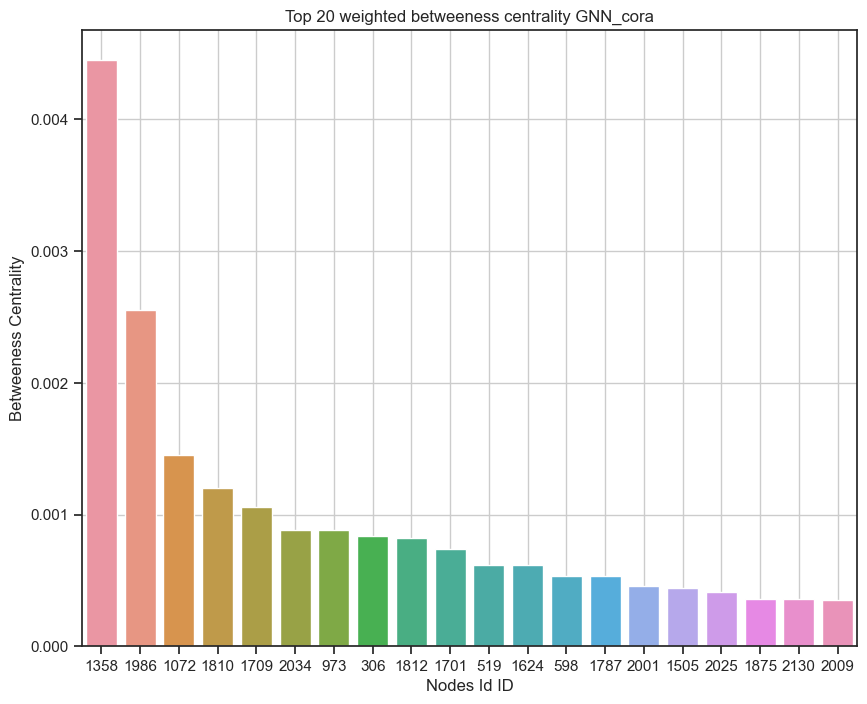

In [34]:
GNN_betweeness = dict(sorted(GNN_betweeness.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(GNN_betweeness.keys())[:20]))
values = list(GNN_betweeness.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes Id ID')
plt.ylabel('Betweeness Centrality')
plt.title('Top 20 weighted betweeness centrality GNN_cora')
plt.grid()
plt.show()

## cora graph

In [35]:
bet_cora_graph = nx.betweenness_centrality(cora_graph)

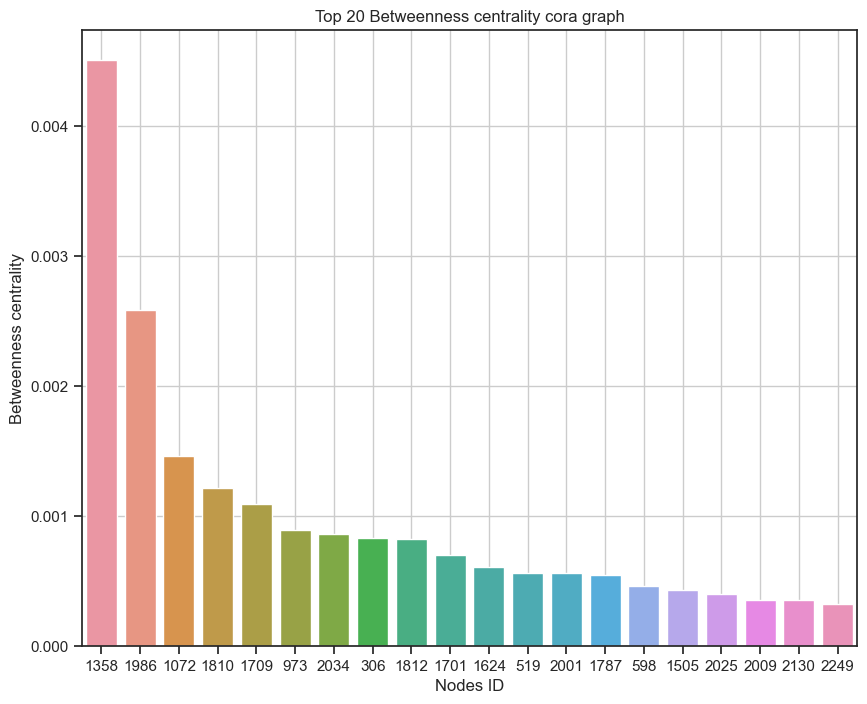

In [36]:
bet_cora_graph = dict(sorted(bet_cora_graph.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(bet_cora_graph.keys())[:20]))
values = list(bet_cora_graph.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Betweenness centrality')
plt.title('Top 20 Betweenness centrality cora graph')
plt.grid()
plt.show()

# Closeness Centrality

## GNN_cora

In [37]:
#questa centralità interpreta i pesi come distanza
GNN_closeness = nx.closeness_centrality(GNN_dist, distance = 'weight')

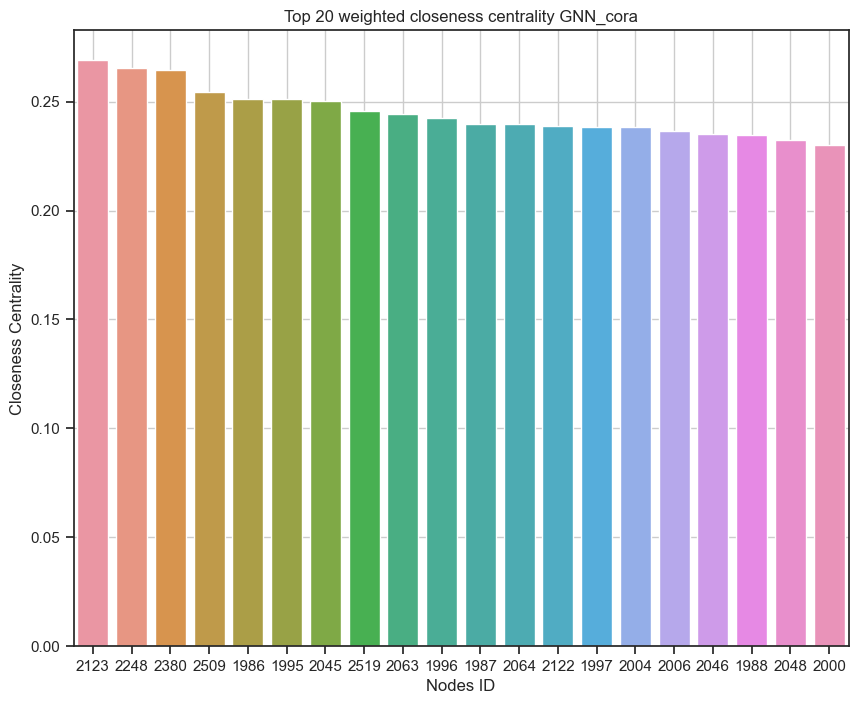

In [38]:
GNN_closeness = dict(sorted(GNN_closeness.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(GNN_closeness.keys())[:20]))
values = list(GNN_closeness.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Closeness Centrality')
plt.title('Top 20 weighted closeness centrality GNN_cora')
plt.grid()
plt.show()

## cora

In [39]:
closeness_cora_graph = nx.closeness_centrality(cora_graph)

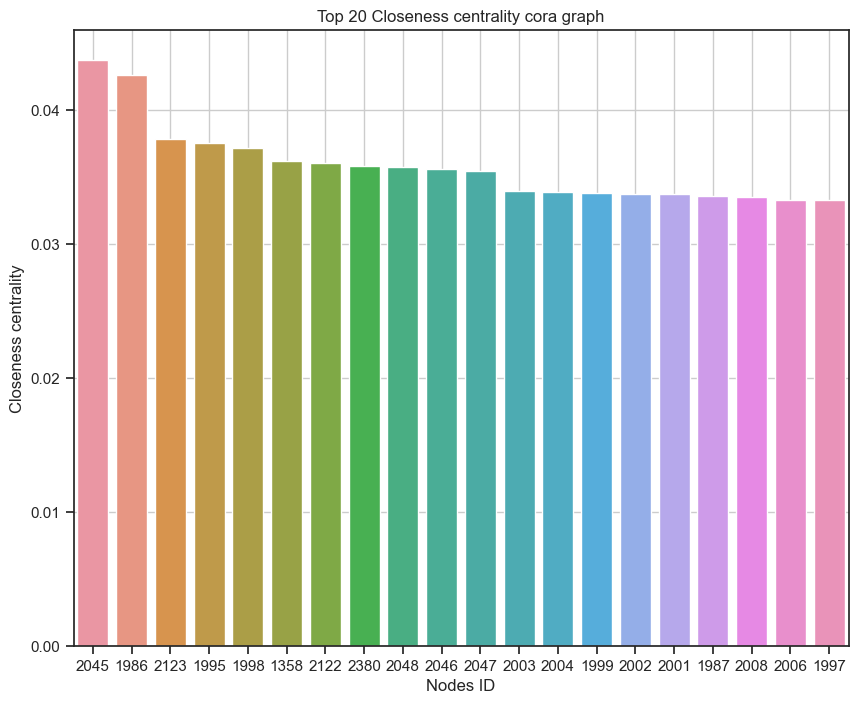

In [40]:
closeness_cora_graph = dict(sorted(closeness_cora_graph.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(closeness_cora_graph.keys())[:20]))
values = list(closeness_cora_graph.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Closeness centrality')
plt.title('Top 20 Closeness centrality cora graph')
plt.grid()
plt.show()

# Eigenvectror Centrality

## GNN_cora

In [41]:
GNN_eigenvector = nx.eigenvector_centrality(GNN_sim, weight = 'weight', max_iter = 1000)

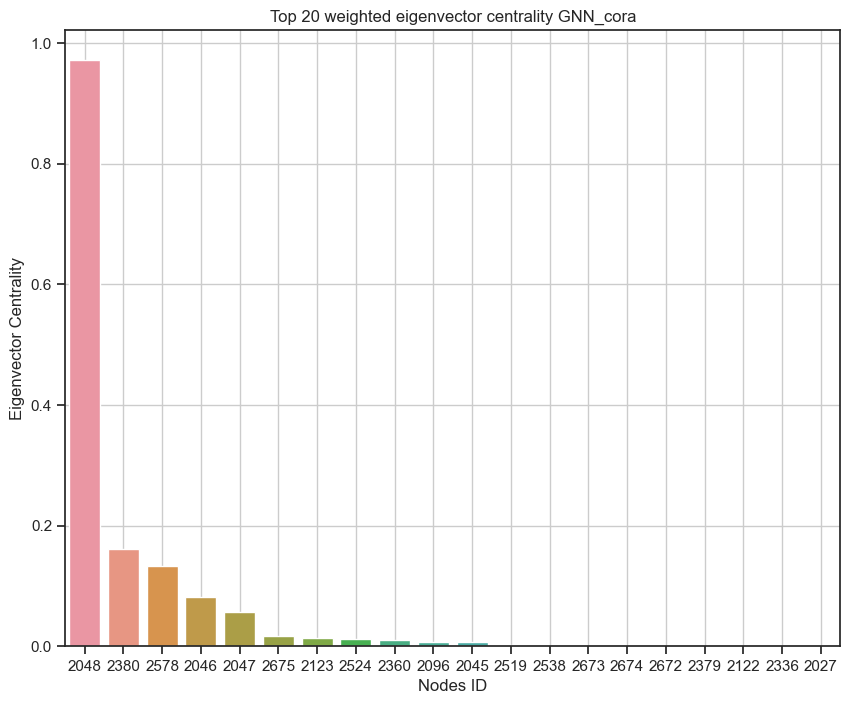

In [42]:
GNN_eigenvector = dict(sorted(GNN_eigenvector.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(GNN_eigenvector.keys())[:20]))
values = list(GNN_eigenvector.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Eigenvector Centrality')
plt.title('Top 20 weighted eigenvector centrality GNN_cora')
plt.grid()
plt.show()

## cora graph

In [43]:
eigen_cora_graph = nx.eigenvector_centrality(cora_graph, max_iter = 1000)

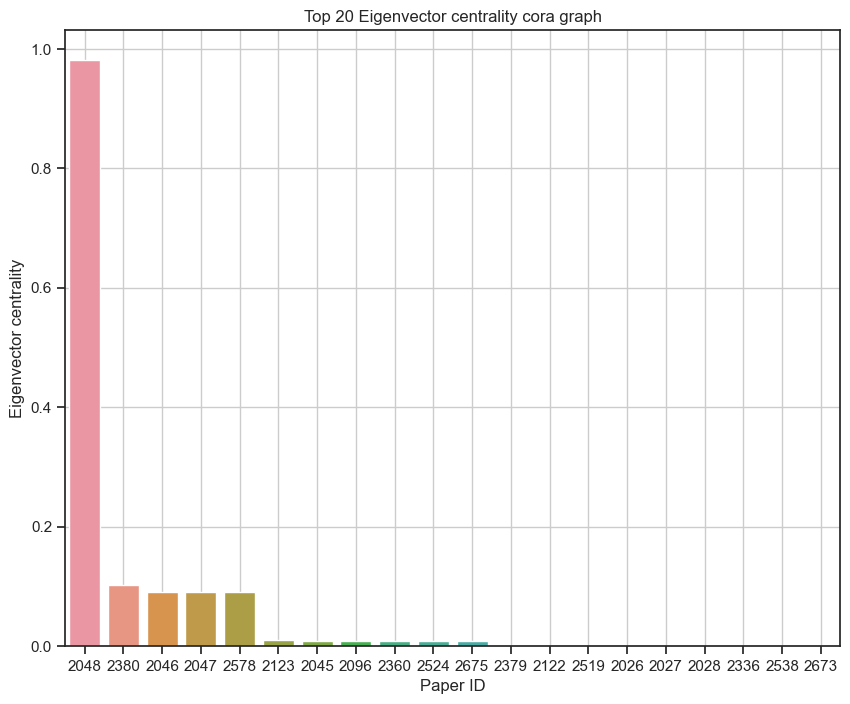

In [44]:
eigen_cora_graph = dict(sorted(eigen_cora_graph.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(eigen_cora_graph.keys())[:20]))
values = list(eigen_cora_graph.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Paper ID')
plt.ylabel('Eigenvector centrality')
plt.title('Top 20 Eigenvector centrality cora graph')
plt.grid()
plt.show()

# Efficiency

In [45]:
# Calculate the weighted global efficiency
def weighted_global_efficiency(G):
  weighted_efficiency = 0
  for node in G.nodes():
      shortest_paths = nx.shortest_path_length(G, source=node, weight='weight')
      efficiency = sum([1.0 / d for d in shortest_paths.values() if d > 0])
      weighted_efficiency += efficiency

  weighted_efficiency /= (len(G) * (len(G) - 1))
  return round(weighted_efficiency, 3)

In [46]:
#efficiency sulla rete vista dalla GNN
weighted_global_efficiency(GNN_dist)

0.068

In [47]:
weighted_global_efficiency(cora_graph)

0.004

## Modularity

In [48]:

def weighted_modularty(G):
  # Compute the partition of the graph using the Louvain method
  partition = greedy_modularity_communities(G, weight='weight')

  # Compute the modularity of the partition using the Louvain method
  modularity = nx.algorithms.community.quality.modularity(G, partition, weight='weight')
  return round(modularity, 3)

In [49]:
print(weighted_modularty(GNN_sim))

0.827


In [50]:
print(weighted_modularty(cora_graph))

0.807


# Community

In [51]:
#define Jaccard Similarity function
def jaccard(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

comm_GNN = greedy_modularity_communities(GNN_sim, weight='weight')
comm_cora = greedy_modularity_communities(cora_graph)

In [52]:
print(len(comm_GNN))
print(len(comm_cora))

109
109


In [74]:
for c in range(len(comm_cora)):
    print(len(comm_GNN[c]),len(comm_cora[c]),jaccard(comm_GNN[c], comm_cora[c]))

400 367 0.8799019607843137
289 286 0.46683673469387754
210 229 0.5848375451263538
195 222 0.009685230024213076
194 216 0.0024449877750611247
165 197 0.002770083102493075
163 154 0.770949720670391
145 110 0.045081967213114756
97 92 0.9484536082474226
94 87 0.0
79 84 0.0
76 82 0.0
69 55 0.0
41 55 0.7454545454545455
40 29 0.0
28 29 0.9655172413793104
26 27 0.0
25 26 0.0
23 26 0.0
21 25 0.0
20 14 0.0
14 13 0.0
13 13 0.0
13 12 0.0
13 9 0.0
10 9 0.0
9 9 0.0
9 8 0.0
8 8 0.0
8 8 0.0
8 8 0.0
7 6 0.0
6 6 0.0
6 5 0.0
6 5 0.0
5 5 0.0
5 5 0.0
5 4 0.0
4 4 0.0
4 4 1.0
4 4 1.0
4 4 1.0
4 4 1.0
4 4 1.0
4 4 1.0
3 3 1.0
3 3 1.0
3 3 1.0
3 3 1.0
3 3 1.0
3 3 1.0
3 3 1.0
2 2 1.0
2 2 1.0
2 2 1.0
2 2 1.0
2 2 1.0
2 2 1.0
2 2 1.0
2 2 1.0
2 2 1.0
2 2 1.0
2 2 1.0
2 2 1.0
2 2 1.0
2 2 1.0
2 2 1.0
2 2 1.0
2 2 1.0
2 2 1.0
2 2 1.0
2 2 1.0
2 2 1.0
2 2 1.0
2 2 1.0
2 2 1.0
2 2 1.0
2 2 1.0
2 2 1.0
2 2 1.0
2 2 1.0
2 2 1.0
2 2 1.0
2 2 1.0
2 2 1.0
2 2 1.0
2 2 1.0
2 2 1.0
2 2 1.0
2 2 1.0
2 2 1.0
2 2 1.0
2 2 1.0
2 2 1.0
2 2 1.0


In [73]:
len(comm_cora[0])

367

In [72]:
len(comm_GNN[0])

400

In [56]:
labels = df_nodes['label'].unique()
mapping = {}
for i in range(len(df_nodes)):
  mapping[i] = df_nodes.loc[i]['label']

In [57]:
def gini_index(cluster, labels):
    """
    Calculates the Gini Index for a given cluster of objects and 7 labels.

    Parameters:
        cluster (list): A list of objects in the cluster.
        labels (list): A list of 7 labels.

    Returns:
        float: The Gini Index for the given cluster and labels.
    """
    total_count = len(cluster)
    if total_count == 0:
        return 0.0

    gini_sum = 0.0
    for label in labels:
        label_count = sum([1 for obj in cluster if mapping[obj] == label])
        label_freq = label_count / total_count
        gini_sum += label_freq ** 2

    gini_index = 1.0 - gini_sum  
    return round(gini_index, 3)

In [58]:
import scipy

gini_GNN = [gini_index(i,labels) for i in comm_GNN]
gini_cora = [gini_index(i,labels) for i in comm_cora]
#scipy.stats.wilcoxon(gini_GNN, gini_cora)

In [59]:
print('mannwhitneyu',scipy.stats.mannwhitneyu(gini_GNN, gini_cora))

mannwhitneyu MannwhitneyuResult(statistic=6005.0, pvalue=0.8605334448955133)


In [60]:
df_nodes['label'].unique()

array([3, 4, 0, 2, 1, 5, 6], dtype=int64)

<AxesSubplot:>

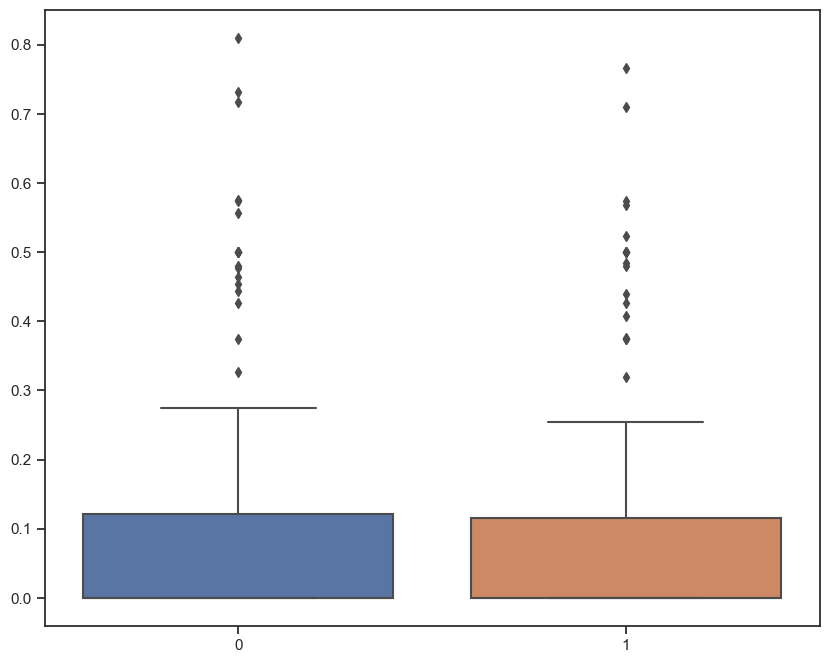

In [61]:
import numpy as np
import seaborn as sns

all_arr = [gini_GNN, gini_cora]

sns.boxplot(data=all_arr, )

In [62]:
gini=0
clusters = comm_GNN
for com in clusters:
  
  gini += gini_index(com, labels)
avg_gini= round(gini/len(clusters), 3)

avg_gini

0.104

In [63]:
gini=0
clusters = comm_cora
for com in clusters:
  
  gini += gini_index(com, labels)
avg_gini= round(gini/len(clusters), 3)

avg_gini

0.097

In [64]:
#out degree
x1 = list(GNN_dist_out_degree.keys())[:100]
x2 = list(cora_out_degree.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
#w_t, w_p = stats.weightedtau(x1,x2) #vedo se considerarlo
print('tau:',tau)
print('p_value',p_value)
#print('w-tau:',w_t)
#print('w-p_value',w_p)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: -0.07717171717171718
p_value 0.25527058076132514
Jaccard Index: 0.32450331125827814
[88, 306, 1013, 1072, 1358, 118, 1224, 645, 109, 1131, 1701, 436, 415, 1986, 733, 1351, 239, 454, 1309, 598, 1441, 490, 748, 1810, 1914, 973, 437, 711, 1070, 661, 55, 505, 519, 1399, 95, 441, 1396, 702, 651, 1655, 102, 836, 69, 231, 429, 831, 548, 210, 175, 1042, 191, 1624, 279, 695, 1015, 1487, 417, 465, 1623, 644, 506, 94, 873, 30, 218, 1692, 756, 401, 482, 350, 41, 85, 724, 344, 581, 1065, 481, 2034, 471, 121, 1377, 1501, 809, 945, 1682, 277, 604, 603, 1592, 897, 596, 989, 1370, 638, 1973, 524, 755, 530, 266, 518]
[1358, 306, 88, 109, 1701, 1013, 1986, 598, 733, 95, 118, 1224, 1072, 415, 1623, 1042, 310, 436, 1810, 661, 1131, 429, 963, 507, 55, 239, 73, 154, 645, 1015, 1441, 1103, 2001, 94, 687, 218, 350, 1229, 1119, 59, 65, 89, 734, 1169, 1542, 577, 748, 657, 505, 2034, 279, 33, 48, 1309, 74, 1624, 487, 454, 525, 316, 364, 1050, 1257, 490, 702, 1416, 1703, 36, 210, 1628, 456, 736, 102, 133, 519

In [65]:
#in degree
x1 = list(GNN_dist_in_degree.keys())[:100]
x2 = list(cora_in_degree.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
#w_t, w_p = stats.weightedtau(x1,x2) #vedo se considerarlo
print('tau:',tau)
print('p_value',p_value)
#print('w-tau:',w_t)
#print('w-p_value',w_p)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: 0.1381818181818182
p_value 0.04164684710249315
Jaccard Index: 0.3333333333333333
[1358, 1986, 1701, 1914, 2034, 1810, 2045, 1072, 2394, 973, 2155, 1973, 1013, 2309, 1623, 1869, 1583, 2282, 1527, 2071, 1776, 1224, 2025, 1616, 2388, 1894, 1732, 1907, 1501, 1483, 1441, 1785, 1725, 1131, 1912, 1908, 2485, 2291, 2228, 1505, 1351, 2385, 711, 2112, 2217, 950, 1495, 2326, 1797, 1542, 1624, 1789, 2436, 1882, 2227, 1851, 1799, 1957, 1998, 498, 1464, 733, 2395, 1729, 2080, 885, 1444, 2018, 1842, 2367, 1759, 2016, 441, 1416, 2480, 1909, 2359, 1871, 2094, 598, 1713, 1741, 573, 2059, 2405, 2160, 2178, 1681, 1065, 1849, 1837, 842, 1413, 1692, 1898, 2113, 519, 1309, 1804, 1975]
[1358, 1701, 1986, 2034, 1810, 2045, 1914, 1623, 1542, 1765, 2182, 1483, 1950, 2155, 2394, 1169, 2248, 1072, 598, 1973, 1441, 1413, 2450, 1966, 306, 973, 1692, 1894, 2130, 2464, 1416, 2367, 1013, 2080, 1927, 2451, 2359, 2383, 2671, 1703, 2238, 1725, 1628, 2122, 1776, 2025, 1742, 1869, 1740, 2083, 2176, 733, 2054, 2199, 162

In [66]:
#betweennes
x1 = list(GNN_betweeness.keys())[:100]
x2 = list(bet_cora_graph.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
print('tau:',tau)
print('p_value',p_value)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: 0.07313131313131314
p_value 0.28099882495079476
Jaccard Index: 0.8018018018018018
[1358, 1986, 1072, 1810, 1709, 2034, 973, 306, 1812, 1701, 519, 1624, 598, 1787, 2001, 1505, 2025, 1875, 2130, 2009, 2249, 1131, 836, 454, 1914, 1224, 1013, 1070, 935, 728, 441, 1623, 2045, 2671, 2040, 644, 733, 985, 236, 1229, 1703, 1169, 1721, 1742, 1299, 1740, 1894, 1038, 1776, 1927, 231, 1920, 1416, 2026, 387, 2027, 1849, 1725, 1499, 2335, 1968, 869, 1483, 1929, 1987, 1996, 1655, 760, 581, 1196, 1042, 596, 661, 1902, 1542, 1103, 1154, 139, 854, 876, 1728, 1723, 1599, 109, 2003, 1149, 1739, 1708, 1062, 2123, 1749, 567, 1583, 1873, 1441, 1926, 1923, 1616, 1525, 687]
[1358, 1986, 1072, 1810, 1709, 973, 2034, 306, 1812, 1701, 1624, 519, 2001, 1787, 598, 1505, 2025, 2009, 2130, 2249, 836, 1131, 1013, 1914, 1224, 1070, 935, 441, 728, 454, 2045, 2671, 1623, 644, 733, 2040, 985, 1894, 1725, 1229, 1703, 1740, 1873, 671, 1776, 1920, 231, 1416, 1927, 387, 1169, 2026, 1038, 2027, 687, 2335, 1742, 1929, 1483,

In [67]:
#closeness
x1 = list(GNN_closeness.keys())[:20]
x2 = list(closeness_cora_graph.keys())[:20]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
print('tau:',tau)
print('p_value',p_value)
print('Jaccard Index:', j )
print(x1)
print(x2)

tau: 0.15789473684210525
p_value 0.3513948581732795
Jaccard Index: 0.42857142857142855
[2123, 2248, 2380, 2509, 1986, 1995, 2045, 2519, 2063, 1996, 1987, 2064, 2122, 1997, 2004, 2006, 2046, 1988, 2048, 2000]
[2045, 1986, 2123, 1995, 1998, 1358, 2122, 2380, 2048, 2046, 2047, 2003, 2004, 1999, 2002, 2001, 1987, 2008, 2006, 1997]


In [68]:
#eigenvector

x1 = list(GNN_eigenvector.keys())[:100]
x2 = list(eigen_cora_graph.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)

print('tau:',tau)
print('p_value',p_value)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: 0.19070707070707074
p_value 0.004933527680537817
Jaccard Index: 0.9230769230769231
[2048, 2380, 2578, 2046, 2047, 2675, 2123, 2524, 2360, 2096, 2045, 2519, 2538, 2673, 2674, 2672, 2379, 2122, 2336, 2027, 2028, 2026, 2685, 2004, 2064, 2063, 2412, 2509, 2477, 2301, 2405, 2637, 2518, 2671, 2002, 2025, 2378, 2121, 2325, 2335, 2003, 2044, 2326, 2348, 2381, 2364, 2328, 2452, 1996, 1997, 1988, 1987, 2006, 2000, 1992, 1995, 1990, 2007, 1994, 2005, 1993, 2008, 1999, 2009, 2552, 2042, 2120, 1989, 1980, 2249, 1998, 2178, 1991, 2001, 2458, 2110, 2375, 2051, 2052, 2189, 2649, 2327, 1798, 2451, 2118, 2292, 1950, 1986, 2306, 2038, 2491, 2040, 2035, 2041, 2039, 2037, 1979, 2281, 2130, 2036]
[2048, 2380, 2046, 2047, 2578, 2123, 2045, 2096, 2360, 2524, 2675, 2379, 2122, 2519, 2026, 2027, 2028, 2336, 2538, 2673, 2674, 2672, 2685, 2004, 2003, 2002, 2326, 2325, 2509, 2025, 2335, 2348, 2301, 2063, 2412, 2477, 2381, 2121, 2064, 2044, 2378, 2518, 2671, 2637, 2364, 2405, 2452, 1998, 1995, 1987, 1999, 2009